In [1]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [2]:
X = df.values[:, 0:10]
Y = df.values[:, 10]

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [4]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print("X_train.shape : ",X_train.shape)
print("X_test.shape : ", X_test.shape)
print("X_val.shape : ", X_val.shape)
print("Y_val.shape : ", Y_val.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape)

X_train.shape :  (1022, 10)
X_test.shape :  (219, 10)
X_val.shape :  (219, 10)
Y_val.shape :  (219,)
Y_train.shape :  (1022,)
Y_test.shape :  (219,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

C:\Users\ALDALEEL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.4695 - loss: 0.6957 - val_accuracy: 0.5251 - val_loss: 0.6926
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5735 - loss: 0.6900 - val_accuracy: 0.5160 - val_loss: 0.6884
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5185 - loss: 0.6878 - val_accuracy: 0.4977 - val_loss: 0.6846
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5218 - loss: 0.6828 - val_accuracy: 0.4977 - val_loss: 0.6811
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5337 - loss: 0.6781 - val_accuracy: 0.4977 - val_loss: 0.6777
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5142 - loss: 0.6763 - val_accuracy: 0.5114 - val_loss: 0.6741
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5312 - loss: 0.6723 - val_accuracy: 0.5160 - val_loss: 0.6705
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5614 - loss: 0.6639 - val_accuracy: 0.

In [9]:
test_loss,test_accuracy=model.evaluate(X_test, Y_test)

print(test_loss)
print(test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8880 - loss: 0.2909  
0.287207692861557
0.8858447670936584


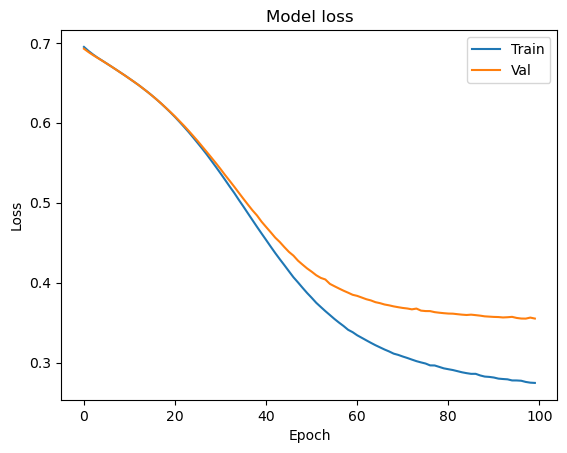

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

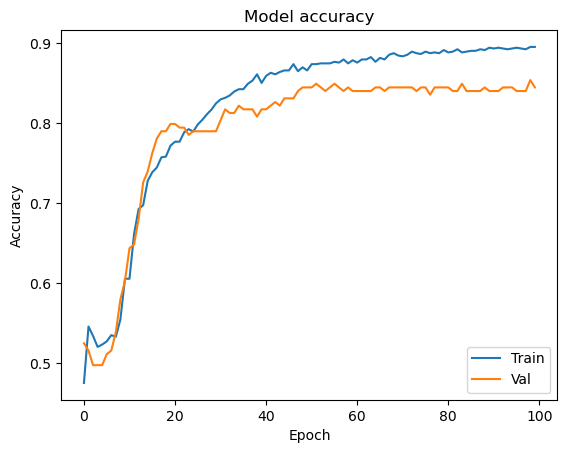

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [54]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

C:\Users\ALDALEEL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 177ms/step - accuracy: 0.6718 - loss: 0.5548 - val_accuracy: 0.8219 - val_loss: 0.4100
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.8546 - loss: 0.3480 - val_accuracy: 0.8311 - val_loss: 0.3759
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.8862 - loss: 0.2868 - val_accuracy: 0.8767 - val_loss: 0.3223
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.9001 - loss: 0.2675 - val_accuracy: 0.8630 - val_loss: 0.3784
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8871 - loss: 0.2806 - val_accuracy: 0.8858 - val_loss: 0.3166
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.8837 - loss: 0.2605 - val_accuracy: 0.8676 - val_loss: 0.3173
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.8866 - loss: 0.2550 - val_accuracy: 0.8904 - val_loss: 0.3189
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.8928 - loss: 0.2473 - val_acc

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [15]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.8885 - loss: 0.4212 - val_accuracy: 0.8721 - val_loss: 0.4753
Epoch 81/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.8944 - loss: 0.4333 - val_accuracy: 0.8630 - val_loss: 0.4706
Epoch 82/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8703 - loss: 0.4395 - val_accuracy: 0.8630 - val_loss: 0.5050
Epoch 83/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8743 - loss: 0.4652 - val_accuracy: 0.8539 - val_loss: 0.4935
Epoch 84/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8872 - loss: 0.4160 - val_accuracy: 0.8584 - val_loss: 0.4818
Epoch 85/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.8756 - loss: 0.4244 - val_accuracy: 0.8676 - val_loss: 0.4751
Epoch 86/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8987 - loss: 0.4167 - val_accuracy: 0.8630 - val_loss: 0.4705
Epoch 87/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8739 - loss: 0.4501 - val_accuracy: 0.86

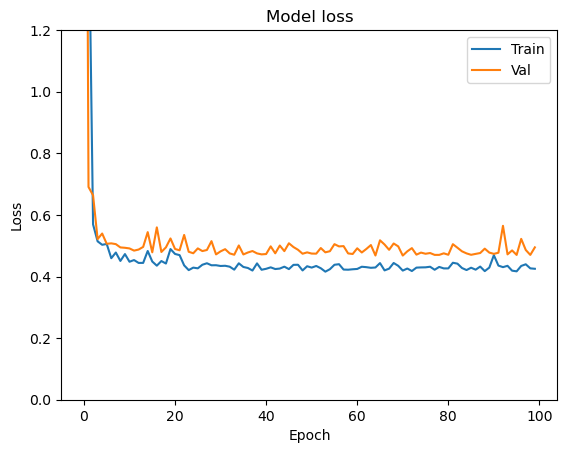

In [16]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

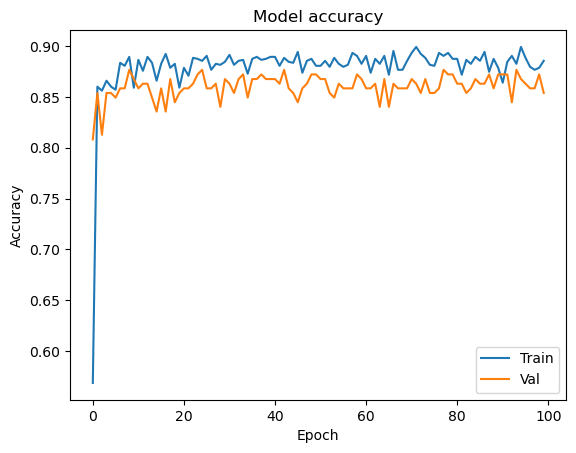

In [17]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
from sklearn.metrics import recall_score, f1_score, precision_score

In [19]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [20]:
y_pred_classes=[]

for prob in y_pred:
    if prob >= 0.5:
        y_pred_classes.append(1)
    else:
        y_pred_classes.append(0)

In [21]:
precision = precision_score(Y_test, y_pred_classes)

recall = recall_score(Y_test, y_pred_classes)

f1 = f1_score(Y_test, y_pred_classes)

print("Precision:", round(precision*100,0))
print("Recall:", round(recall*100,0))
print("F1 Score:", round(f1*100,0))

Precision: 85.0
Recall: 90.0
F1 Score: 87.0


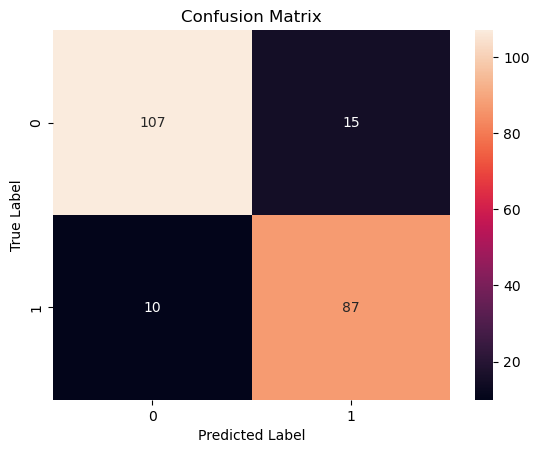

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(Y_test, y_pred_classes)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
model.save("houses_model.keras")

In [24]:
from joblib import dump

dump(min_max_scaler, "houses_min_max_scaler.pkl")

['houses_min_max_scaler.pkl']

In [25]:
import numpy as np

new_house = np.array( [[100,6,6,800, 2, 2, 3, 7, 1, 500]])

In [26]:
from joblib import load

min_max_scaler_loaded = load("houses_min_max_scaler.pkl")

new_house = min_max_scaler.transform(new_house)
new_house

array([[-0.00560892,  0.55555556,  0.625     ,  0.1309329 ,  0.66666667,
         1.        ,  0.375     ,  0.41666667,  0.33333333,  0.35260931]])

In [27]:
from keras.models import load_model

loaded_model = load_model("houses_model.keras")

In [28]:
new_prediction_proba = loaded_model.predict(new_house)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
[[ True]]
